# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities=
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | bardai
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | chinde
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | kapsabet
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | alotau
City not found. Skipping...
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | brisas de zicatela
Processing Record 15 of Set 1 | terrace
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | ust'-ilimsk
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | gorontalo
Processing Record 21 of Set 1 | richards bay
Processing Record 22 of Set 1 | p

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)           

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,49.71,91,40,4.61,GB,1710262561
1,bardai,11.6500,7.2333,98.73,8,92,9.73,NG,1710262562
2,puerto natales,-51.7236,-72.4875,59.45,36,40,23.02,CL,1710262562
3,kodiak,57.7900,-152.4072,23.50,65,94,9.10,US,1710262562
4,waitangi,-43.9535,-176.5597,55.81,76,100,1.99,NZ,1710262562


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,49.71,91,40,4.61,GB,1710262561
1,bardai,11.6500,7.2333,98.73,8,92,9.73,NG,1710262562
2,puerto natales,-51.7236,-72.4875,59.45,36,40,23.02,CL,1710262562
3,kodiak,57.7900,-152.4072,23.50,65,94,9.10,US,1710262562
4,waitangi,-43.9535,-176.5597,55.81,76,100,1.99,NZ,1710262562


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

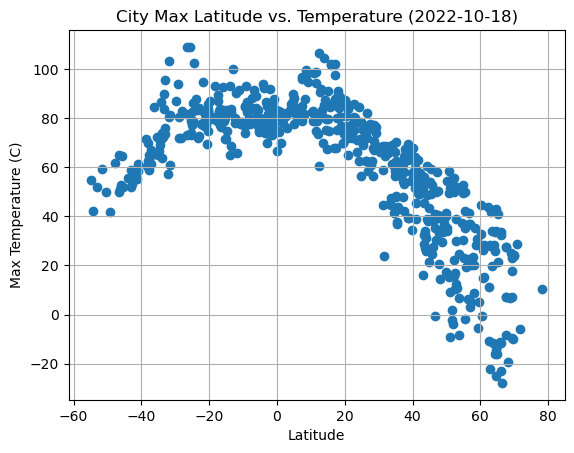

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

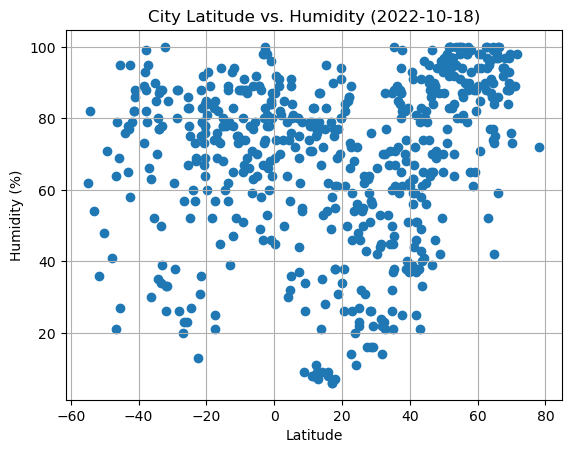

In [19]:
# Build the scatter plots for latitude vs. humidity
x_values2 = city_data_df['Lat']
y_values2 = city_data_df['Humidity']
plt.scatter(x_values2,y_values2)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

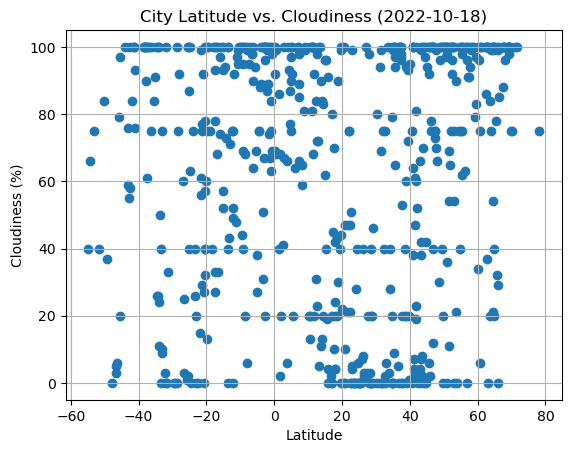

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_values3 = city_data_df['Lat']
y_values3 = city_data_df['Cloudiness']
plt.scatter(x_values3,y_values3)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

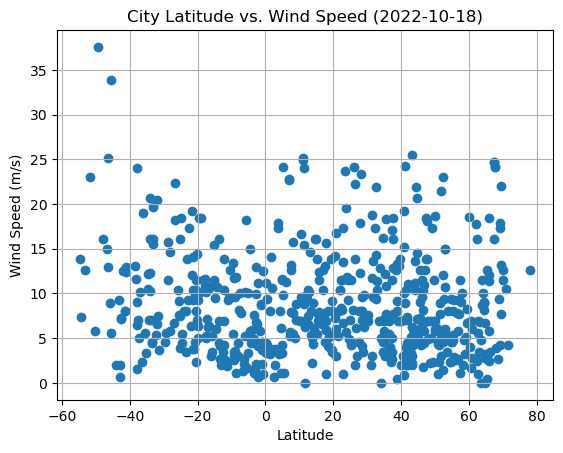

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_values4 = city_data_df['Lat']
y_values4 = city_data_df['Wind Speed']
plt.scatter(x_values4,y_values4)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
from scipy import stats

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = pd.DataFrame(city_data_df)

northern_hemi_df = northern_df[northern_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,49.71,91,40,4.61,GB,1710262561
1,bardai,11.6500,7.2333,98.73,8,92,9.73,NG,1710262562
3,kodiak,57.7900,-152.4072,23.50,65,94,9.10,US,1710262562
5,chinde,26.8418,88.0763,58.30,31,1,6.15,NP,1710262562
8,kapsabet,0.2039,35.1050,74.75,45,92,4.41,KE,1710262562


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = pd.DataFrame(city_data)

southern_hemi_df = southern_df[southern_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,puerto natales,-51.7236,-72.4875,59.45,36,40,23.02,CL,1710262562
4,waitangi,-43.9535,-176.5597,55.81,76,100,1.99,NZ,1710262562
6,blackmans bay,-43.0167,147.3167,51.93,78,59,1.97,AU,1710262562
7,invercargill,-46.4000,168.3500,51.03,79,6,13.00,NZ,1710262562
10,grytviken,-54.2811,-36.5092,42.03,82,66,7.36,GS,1710262446


###  Temperature vs. Latitude Linear Regression Plot

y = -1.29x + 99.29
The r-value is: 0.747230553238743


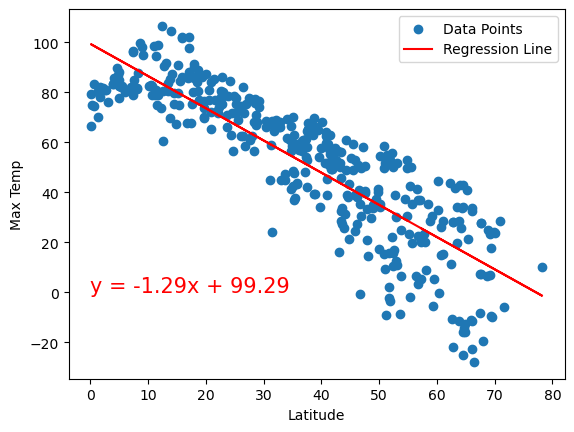

In [25]:
# Linear regression on Northern Hemisphere
x_values6 = northern_hemi_df["Lat"]
y_values6 = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values6, y_values6)

regress_values = x_values6 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)

# Create a scatter plot with the regression line
plt.scatter(x_values6, y_values6, label="Data Points")
plt.plot(x_values6, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("output_data/Fig6.png")
plt.show()

y = 0.51x + 87.37
The r-value is: 0.3758568220133913


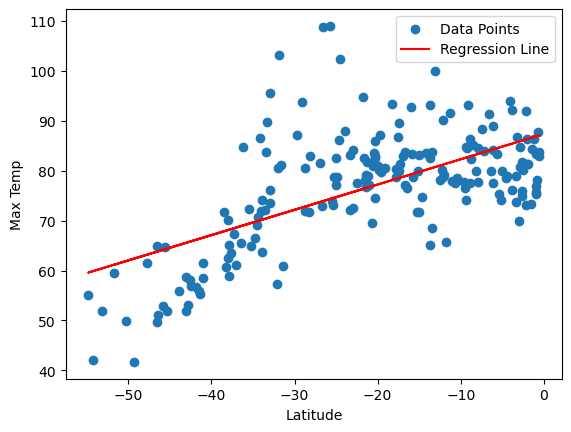

In [26]:
# Linear regression on Southern Hemisphere 
x_values5 = southern_hemi_df["Lat"]
y_values5 = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values5, y_values5)

regress_values = x_values5 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)

# Create a scatter plot with the regression line
plt.scatter(x_values5, y_values5, label="Data Points")
plt.plot(x_values5, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("output_data/Fig5.png")
plt.show()

**Discussion about the linear relationship:** The linear regression analysis indicates a moderately strong negative correlation between temperature and latitude in the Northern Hemisphere, suggesting that as latitude increases (moving away from the equator), temperatures tend to decrease. Conversely, in the Southern Hemisphere, there is a weaker positive correlation, indicating that as latitude increases (approaching the equator), temperatures tend to increase, although to a lesser extent. These findings suggest a general trend of temperature variation with latitude, influenced by the Earth's axial tilt and seasonal variations.

### Humidity vs. Latitude Linear Regression Plot

y = 0.56x + 47.88
The r-value is: 0.18556315092988196


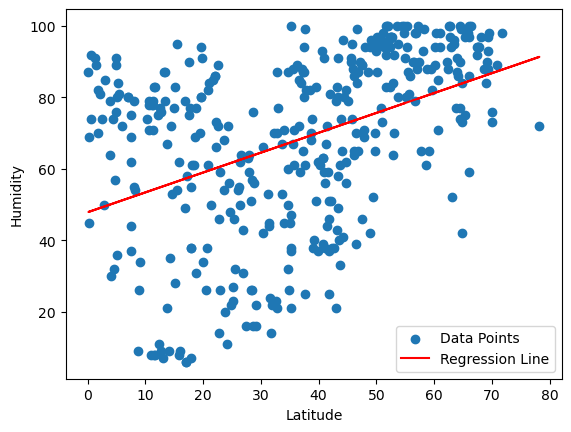

In [27]:
# Northern Hemisphere
x_values7 = northern_hemi_df["Lat"]
y_values7 = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values7, y_values7)

regress_values = x_values7 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)

# Create a scatter plot with the regression line
plt.scatter(x_values7, y_values7, label="Data Points")
plt.plot(x_values7, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("output_data/Fig7.png")
plt.show()

y = 0.25x + 75.85
The r-value is: 0.033178615930914694


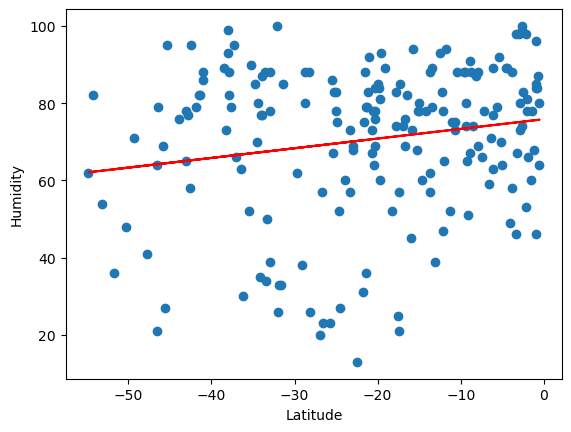

In [28]:
# Southern Hemisphere
x_values8 = southern_hemi_df["Lat"]
y_values8 = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values8, y_values8)

regress_values = x_values8 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)
     
# Create a scatter plot with the regression line
plt.scatter(x_values8, y_values8, label="Data Points")
plt.plot(x_values8, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig8.png")
plt.show()


**Discussion about the linear relationship:** The linear regression analysis reveals a very weak positive correlation between humidity and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, as latitude increases (moving away from the equator), humidity tends to slightly increase, while in the Southern Hemisphere, there is also a slight increase in humidity as latitude increases (approaching the equator). However, the low r-values suggest that latitude may not be a strong predictor of humidity variation, indicating that other factors likely play a more significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.43x + 43.61
The r-value is: 0.044951138823459094


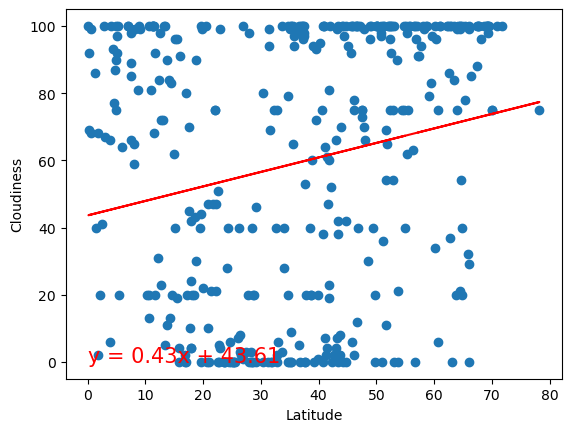

In [29]:
# Northern Hemisphere
x_values9 = northern_hemi_df["Lat"]
y_values9 = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values9, y_values9)

regress_values = x_values9 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)
     
# Create a scatter plot with the regression line
plt.scatter(x_values9, y_values9, label="Data Points")
plt.plot(x_values9, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig9.png")
plt.show()

y = 0.56x + 77.71
The r-value is: 0.05396090997387558


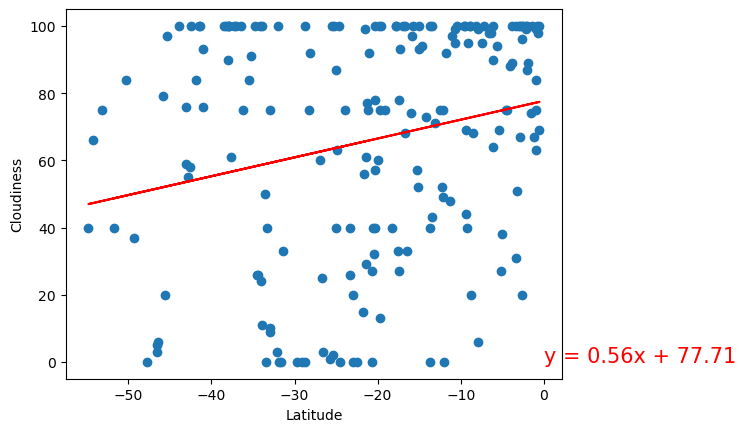

In [30]:
# Southern Hemisphere
x_values10 = southern_hemi_df["Lat"]
y_values10 = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values10, y_values10)

regress_values = x_values10 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)
     
# Create a scatter plot with the regression line
plt.scatter(x_values10, y_values10, label="Data Points")
plt.plot(x_values10, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** 
The linear regression analysis demonstrates a weak positive correlation between cloudiness and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, as latitude increases (moving away from the equator), cloudiness tends to slightly increase. Similarly, in the Southern Hemisphere, there is a slight increase in cloudiness as latitude increases (approaching the equator). However, the low r-values suggest that latitude may not be a strong predictor of cloudiness variation, indicating that other factors likely contribute more significantly to cloud cover patterns.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.01x + 9.13
The r-value is: 0.001453904193994209


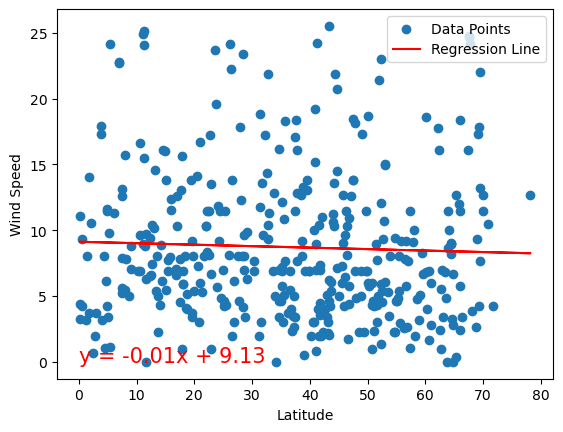

In [31]:
# Northern Hemisphere
x_values11 = northern_hemi_df["Lat"]
y_values11 = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values11, y_values11)

regress_values = x_values11 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)
     
# Create a scatter plot with the regression line
plt.scatter(x_values11, y_values11, label="Data Points")
plt.plot(x_values11, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("output_data/Fig11.png")
plt.show()

y = -0.16x + 5.5
The r-value is: 0.1454428567911766


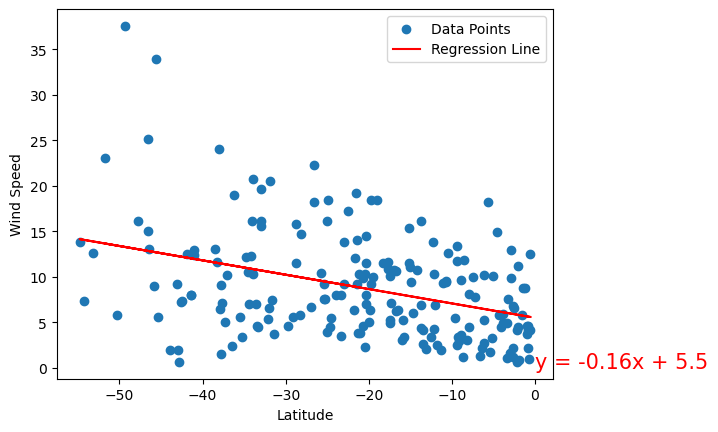

In [32]:
# Southern Hemisphere
x_values12 = southern_hemi_df["Lat"]
y_values12 = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values12, y_values12)

regress_values = x_values12 * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_equation)
     
# Create a scatter plot with the regression line
plt.scatter(x_values12, y_values12, label="Data Points")
plt.plot(x_values12, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** The linear regression analysis reveals a very weak negative correlation between wind speed and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, as latitude increases (moving away from the equator), wind speed tends to slightly decrease. Similarly, in the Southern Hemisphere, there is a slight decrease in wind speed as latitude increases (approaching the equator). However, the low r-values suggest that latitude may not be a strong predictor of wind speed variation, indicating that other factors likely play a more significant role in determining wind patterns.